In [9]:
import numpy as np
class KMeans(object):
  def __init__(self, K, init):
    self.K = K
    self.centers = np.ndarray(shape=(len(init), len(init[0])))
    for i in range(len(init)) :
      for j in range(len(init[0])) :
        self.centers[i, j]=init[i][j]
    self.new_centers = np.ndarray(shape=(len(self.centers), len(self.centers[0])))
  def fit(self, X):
    X=np.array(X)
    difference=2.0
    self.labels=np.ndarray(shape=(len(X), ))
    while difference>0.001 :
      #print(self.centers)
      for x in range(len(X)) :
        index_min=-1
        mini=0
        i=0
        for k in self.centers :
          c=np.linalg.norm(np.array(X[x]- k))
          if index_min==-1 :
            mini=c
            index_min=i
          else :
            if mini > c :
              index_min=i
              mini=c
          i+=1
        self.labels[x]=index_min
      for k in range(self.K) : 
        for j in range(len(self.new_centers[0])) :
           self.new_centers[k, j]=0.0
      #print(self.new_centers)
      for k in range(self.K) :
        number=0
        for i in range(len(X)) :
          if self.labels[i]==k :
            number+=1
            for j in range(len(X[0])) :
              self.new_centers[k, j]+=X[i, j]
        for j in range(len(self.new_centers[0])) :
          self.new_centers[k, j]=self.new_centers[k, j]/number
      #print(self.new_centers)
      difference=-1
      for k in range(self.K) :
        #print(self.centers[k]-self.new_centers[k])
        c=np.linalg.norm(np.array(self.centers[k]-self.new_centers[k]))
        if c>difference :
          difference=c
      #print(dist)
      #print(difference)
      for i in range(len(self.centers)) :
        for j in range(len(self.centers[0])) :
          self.centers[i, j]=self.new_centers[i, j]
      #print(self.centers)
  def predict(self, X):
    X=np.array(X)
    ans=[]  
    for x in X :
      dist=[]
      for i in range(len(self.centers)) :
        dist.append(np.linalg.norm(np.array(x-self.centers[i])))
      ans.append(np.argmin(np.array(dist)))
    return np.array(ans)

Создадим выборку, чтобы проверить работу алгоритма

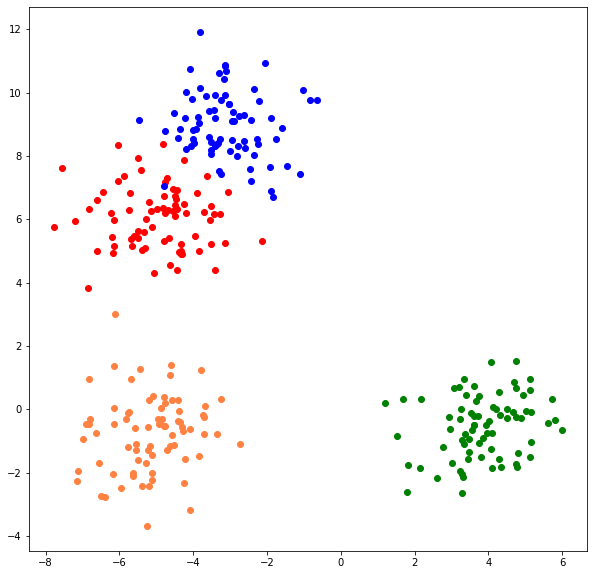

In [5]:
from matplotlib import pyplot  as plt
import pandas as pd
import sklearn.datasets
X, labels = sklearn.datasets.make_blobs(n_samples=300, n_features=2, centers=4)
colors_clusters = ['g', 'b', 'r', '#ff8243']
plt.figure(figsize=(10,10))
for i,p in enumerate(X):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[labels[i]])

Проверим работу алгоритма

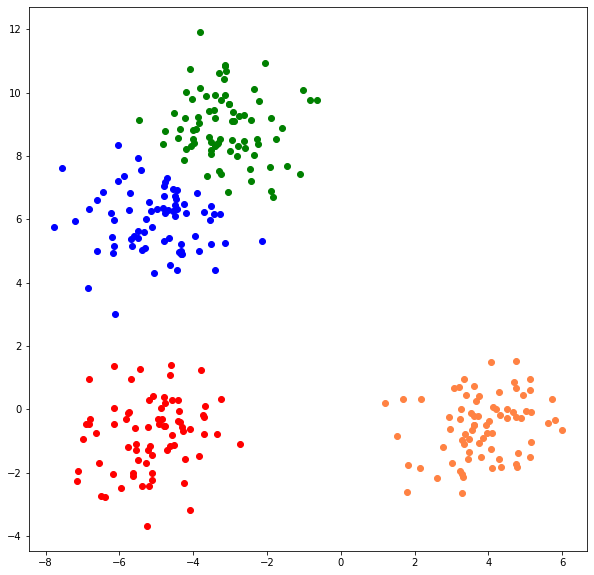

In [7]:
init=np.array([[-4,10], [-6 , 4], [-6, -2], [4, 0]])
kmeans=KMeans(4, init)
kmeans.fit(X)
colors_clusters = ['g', 'b', 'r', '#ff8243']
labels=kmeans.predict(X)
plt.figure(figsize=(10,10))
for i,p in enumerate(X):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[labels[i]])

In [8]:
print(kmeans.predict(np.array([[6, 2], [-6, 6], [-6, -2]])))

[3 1 2]
